In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import sklearn.feature_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('train.csv').drop(columns=["id"])
df

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,36,0,0,Private,Urban,93.962305,33.72,never smoked,0
1,Female,79,0,0,Private,Urban,NaN,31.32,never smoked,1
2,Male,68,0,0,Private,Urban,99.642305,30.60,formerly smoked,0
3,Male,34,0,0,Private,Rural,75.752305,29.76,Unknown,0
4,Male,88,0,0,Self-employed,Rural,92.352305,34.44,never smoked,0
...,...,...,...,...,...,...,...,...,...,...
4995,Female,73,0,0,Private,Rural,66.712305,NaN,never smoked,0
4996,Female,100,0,0,Private,Rural,200.892305,54.60,never smoked,1
4997,Female,96,0,0,Self-employed,Urban,72.712305,37.80,never smoked,0
4998,Male,16,0,0,children,Urban,60.892305,NaN,Unknown,0


In [3]:
le_gender = LabelEncoder()
df["gender"] = le_gender.fit_transform(df["gender"])
le_work_type = LabelEncoder()
df["work_type"] = le_work_type.fit_transform(df["work_type"])
le_Residence_type = LabelEncoder()
df["Residence_type"] = le_Residence_type.fit_transform(df["Residence_type"])
le_smoking_status = LabelEncoder()
df["smoking_status"] = le_smoking_status.fit_transform(df["smoking_status"])
df

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,36,0,0,2,1,93.962305,33.72,2,0
1,0,79,0,0,2,1,NaN,31.32,2,1
2,1,68,0,0,2,1,99.642305,30.60,1,0
3,1,34,0,0,2,0,75.752305,29.76,0,0
4,1,88,0,0,3,0,92.352305,34.44,2,0
...,...,...,...,...,...,...,...,...,...,...
4995,0,73,0,0,2,0,66.712305,NaN,2,0
4996,0,100,0,0,2,0,200.892305,54.60,2,1
4997,0,96,0,0,3,1,72.712305,37.80,2,0
4998,1,16,0,0,4,1,60.892305,NaN,0,0


In [4]:
X = df.drop('stroke',axis=1)  
y = df.stroke

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Perform MICE imputation to fill the missing values
imputer = IterativeImputer(max_iter=10, random_state=0)
X_imputed = imputer.fit_transform(X)


In [6]:
from sklearn.preprocessing import StandardScaler
# Split the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Support Vector Classifier
classifier = SVC(kernel='rbf', C=1.0, probability=True)
classifier.fit(X_train_scaled, y_train)


SVC(probability=True)

In [7]:
# Make predictions on the test set
prediction = classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = np.mean(prediction == y_test)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.905


In [8]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
mse

0.095

In [9]:
# Load testing data
test_data = pd.read_csv('test.csv').drop(columns=["id"])
test_data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,69,0,0,Private,Rural,103.052305,28.20,never smoked
1,Male,67,0,0,Private,Urban,101.482305,55.08,never smoked
2,Male,89,0,0,Govt_job,Rural,96.332305,NaN,Unknown
3,Female,68,0,0,Self-employed,Urban,72.262305,28.92,never smoked
4,Female,100,0,0,Govt_job,Rural,58.632305,NaN,Unknown
...,...,...,...,...,...,...,...,...,...
995,Female,30,0,0,Private,Urban,80.432305,NaN,smokes
996,Male,60,0,0,Private,Rural,NaN,36.60,Unknown
997,Female,41,0,0,Private,Rural,92.182305,25.80,never smoked
998,Male,92,0,0,Govt_job,Urban,61.162305,NaN,never smoked


In [17]:
imputer = IterativeImputer(max_iter=10, random_state=0)  # You can adjust the number of iterations (max_iter) as needed


In [20]:
X_test_imp = scaler.transform(X_test)
X_test_imp

array([[-0.78787407,  0.60694576, -0.2475671 , ..., -0.17234609,
         0.0899743 ,  1.52472148],
       [-0.78787407,  1.24903761, -0.2475671 , ..., -0.38691402,
         0.17650677,  0.57132365],
       [-0.78787407,  0.91109453, -0.2475671 , ..., -0.02958963,
         0.39238777,  0.57132365],
       ...,
       [-0.78787407,  0.80971161, -0.2475671 , ..., -0.34421452,
         0.33226521, -1.33547201],
       [-0.78787407, -0.1027347 , -0.2475671 , ..., -0.04787271,
        -0.24977306, -0.38207418],
       [ 1.26923838,  0.13382546, -0.2475671 , ..., -0.54931809,
         0.31495871,  1.52472148]])

In [10]:
le_gender = LabelEncoder()
test_data["gender"] = le_gender.fit_transform(test_data["gender"])
le_work_type = LabelEncoder()
test_data["work_type"] = le_work_type.fit_transform(test_data["work_type"])
le_Residence_type = LabelEncoder()
test_data["Residence_type"] = le_Residence_type.fit_transform(test_data["Residence_type"])
le_smoking_status = LabelEncoder()
test_data["smoking_status"] = le_smoking_status.fit_transform(test_data["smoking_status"])
test_data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,69,0,0,2,0,103.052305,28.20,2
1,1,67,0,0,2,1,101.482305,55.08,2
2,1,89,0,0,0,0,96.332305,NaN,0
3,0,68,0,0,3,1,72.262305,28.92,2
4,0,100,0,0,0,0,58.632305,NaN,0
...,...,...,...,...,...,...,...,...,...
995,0,30,0,0,2,1,80.432305,NaN,3
996,1,60,0,0,2,0,NaN,36.60,0
997,0,41,0,0,2,0,92.182305,25.80,2
998,1,92,0,0,0,1,61.162305,NaN,2


In [11]:
X_test_imp_1 = imp_1.fit_transform(X_test)

NameError: name 'imp_1' is not defined

In [24]:
X_test_imp_2 = scaler.fit_transform(X_test)

In [21]:
probabilities2 = classifier.predict_proba(X_test_imp)

In [22]:
probabilities2

array([[0.90068154, 0.09931846],
       [0.90762495, 0.09237505],
       [0.90840378, 0.09159622],
       ...,
       [0.91068597, 0.08931403],
       [0.91296338, 0.08703662],
       [0.9119684 , 0.0880316 ]])

In [23]:
probabilities = clf.predict_proba(X_test_imp)

NameError: name 'clf' is not defined

In [57]:
probabilities


array([[0.91108163, 0.08891837],
       [0.91181738, 0.08818262],
       [0.90893256, 0.09106744],
       ...,
       [0.90964071, 0.09035929],
       [0.90904657, 0.09095343],
       [0.9079851 , 0.0920149 ]])

In [28]:
probabilities_1 = clf.predict_proba(X_test_imp_1)

In [24]:

from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
# Create and train the SVM classifier
svm = SVC(probability=True)
calibrated_svc = CalibratedClassifierCV(svm)
calibrated_svc.fit(X_train_imp, y_train)
# Predict stroke for the test set
predictions = clf.predict_proba(X_train_imp)

NameError: name 'X_train_imp' is not defined

In [17]:
na_counts = test_data.isnull().sum()
print(na_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level     84
bmi                  308
smoking_status         0
dtype: int64


In [15]:
na_counts = df.isnull().sum()
print(na_counts)

gender                  0
age                     0
hypertension            0
heart_disease           0
work_type               0
Residence_type          0
avg_glucose_level     393
bmi                  1552
smoking_status          0
stroke                  0
dtype: int64


In [5]:
stroke_count=df['stroke'].value_counts()
stroke_count

0    4502
1     498
Name: stroke, dtype: int64

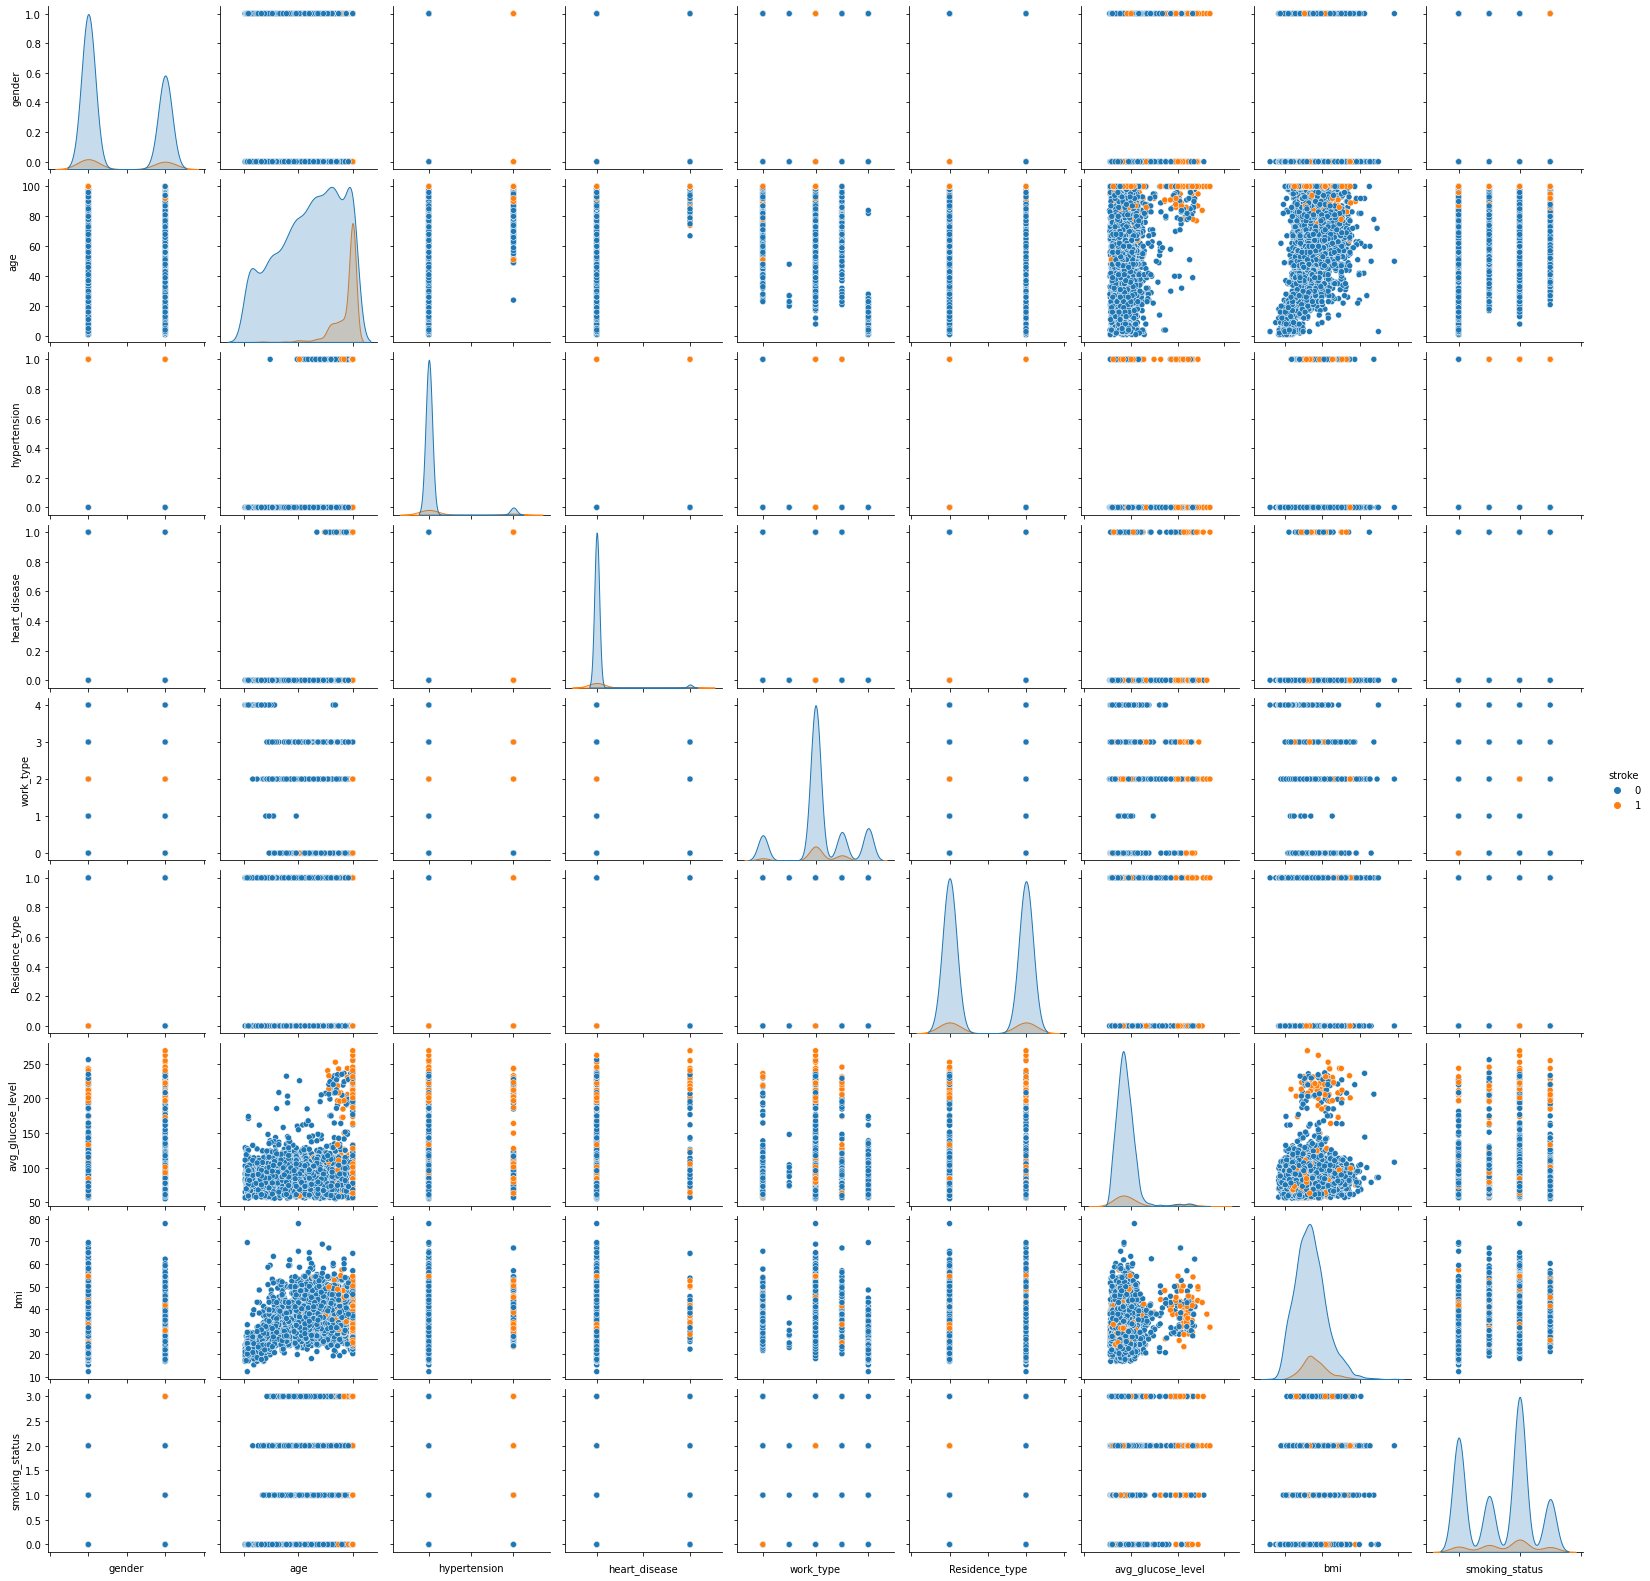

In [6]:
#Displaying Data in the form of a pairplot

data_pairplot = sns.pairplot(df.iloc[:4999], hue="stroke")
data_pairplot.set(xticklabels=[])

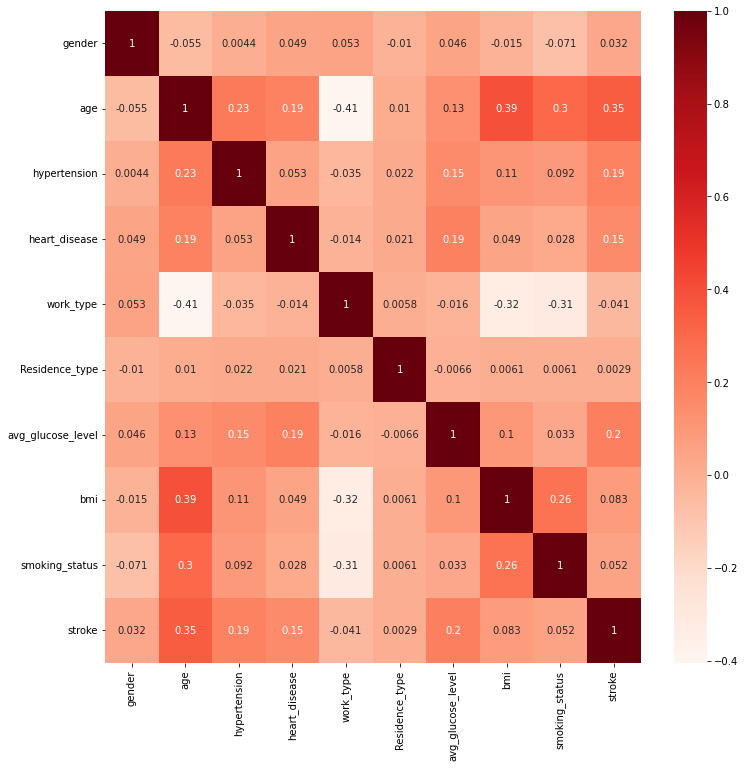

In [7]:
#Using Pearson Correlation to show Correlated Columns
plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
    

In [25]:
df1 = df
column_name = 'bmi'
df1 = df1.dropna(subset=[column_name])

# Assuming X is the feature matrix and y is the target variable
X1 = df1.drop(columns=['bmi','avg_glucose_level'],axis=1)  
y1 = df1.bmi

# Initialize a Random Forest classifier
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X1, y1)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)
print(df1.shape)

          Feature  Importance
1             age    0.542379
4       work_type    0.176084
6  smoking_status    0.124219
5  Residence_type    0.068815
0          gender    0.048224
7          stroke    0.017641
2    hypertension    0.013762
3   heart_disease    0.008874
(3448, 10)


In [26]:
X2 = df1.age
y2 = df1.bmi

# Reshape X to have the required shape for linear regression
X2 = X2.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model_1 = LinearRegression()

# Fit the model to the training data
model_1.fit(X_train, y_train)

# Predict on the test data
y_pred = model_1.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the side-by-side comparison
print(comparison_df)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

      Actual  Predicted
4189   44.16  35.520608
71     33.12  37.757865
805    31.20  31.898383
4738   31.32  34.668320
2865   37.08  37.225185
...      ...        ...
1737   38.16  37.012113
823    37.92  35.733680
2698   35.04  35.414072
1157   38.16  37.757865
107    27.12  34.135640

[690 rows x 2 columns]
Mean Squared Error: 54.21609411343076


In [27]:
X3 = df1[['age', 'work_type', 'smoking_status','Residence_type']]
y3 = df1.bmi

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model_3 = LinearRegression()

# Fit the model to the training data
model_3.fit(X_train, y_train)

# Predict on the test data
y_pred = model_3.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the side-by-side comparison
print(comparison_df)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

      Actual  Predicted
4189   44.16  33.737744
71     33.12  36.546822
805    31.20  33.035010
4738   31.32  37.917533
2865   37.08  37.995509
...      ...        ...
1737   38.16  35.993746
823    37.92  37.873861
2698   35.04  35.818545
1157   38.16  37.556782
107    27.12  37.522480

[690 rows x 2 columns]
Mean Squared Error: 51.26875395309556


In [34]:
df3 = df
column_name = 'avg_glucose_level'
df3 = df3.dropna(subset=[column_name])

# Assuming X is the feature matrix and y is the target variable
X3 = df3.drop(columns=['bmi','avg_glucose_level'],axis=1)  
y3 = df3.avg_glucose_level

# Initialize a Random Forest classifier
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X3, y3)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X3.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)
print(df3.shape)

          Feature  Importance
1             age    0.348861
6  smoking_status    0.182928
4       work_type    0.116446
5  Residence_type    0.102660
0          gender    0.084226
7          stroke    0.066710
3   heart_disease    0.055870
2    hypertension    0.042298
(4607, 10)


In [28]:
df4 = df
df4 = df4.dropna()

# Assuming X is the feature matrix and y is the target variable
X4 = df4.drop('avg_glucose_level',axis=1)  
y4 = df4.avg_glucose_level

# Initialize a Random Forest classifier
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X4, y4)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X4.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)
print(df4.shape)

          Feature  Importance
6             bmi    0.445817
1             age    0.202603
7  smoking_status    0.093244
4       work_type    0.058770
5  Residence_type    0.045768
0          gender    0.045379
8          stroke    0.043188
2    hypertension    0.035179
3   heart_disease    0.030052
(3169, 10)


In [13]:
df3.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1438
smoking_status          0
stroke                  0
dtype: int64

In [14]:
X4 = df3.age
y4 = df3.avg_glucose_level

# Reshape X to have the required shape for linear regression
X4 = X4.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model_2 = LinearRegression()

# Fit the model to the training data
model_2.fit(X_train, y_train)

# Predict on the test data
y_pred = model_2.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the side-by-side comparison
print(comparison_df)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

          Actual  Predicted
2063  102.972305  96.874208
4664   87.352305  93.087087
3406   88.302305  95.752098
258   108.742305  88.598646
3675   97.412305  93.928669
...          ...        ...
2465   90.842305  83.268623
4267   66.662305  93.788405
4621  112.142305  93.788405
1965   79.252305  88.037591
3367  103.232305  96.874208

[922 rows x 2 columns]
Mean Squared Error: 607.4525147620561


In [39]:
X5 = df4[['age', 'bmi']]
y5 = df4.avg_glucose_level


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model_4 = LinearRegression()

# Fit the model to the training data
model_4.fit(X_train, y_train)

# Predict on the test data
y_pred = model_4.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the side-by-side comparison
print(comparison_df)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

          Actual  Predicted
390    79.472305  94.225195
4989   95.492305  89.600555
1502   81.732305  89.620604
1453   70.002305  94.558006
498    88.922305  95.166155
...          ...        ...
4061   78.012305  94.090198
1210   96.112305  93.526146
4746  105.322305  91.277989
1675   87.142305  91.455755
815    82.362305  96.430583

[634 rows x 2 columns]
Mean Squared Error: 597.7807314855692


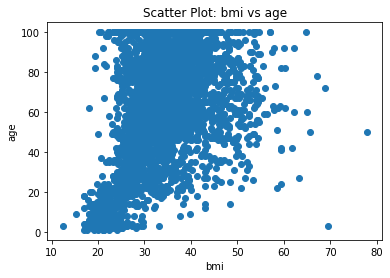

In [16]:
x_column = 'bmi'  # Replace with the name of the x-axis column
y_column = 'age'  # Replace with the name of the y-axis column

# Create the scatter plot
plt.scatter(df[x_column], df[y_column])

# Set labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title("Scatter Plot: " + x_column + " vs " + y_column)

# Show the plot
plt.show()

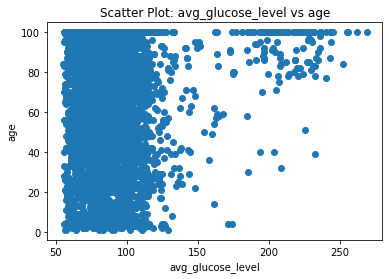

In [17]:
x_column = 'avg_glucose_level'  # Replace with the name of the x-axis column
y_column = 'age'  # Replace with the name of the y-axis column

# Create the scatter plot
plt.scatter(df[x_column], df[y_column])

# Set labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title("Scatter Plot: " + x_column + " vs " + y_column)

# Show the plot
plt.show()

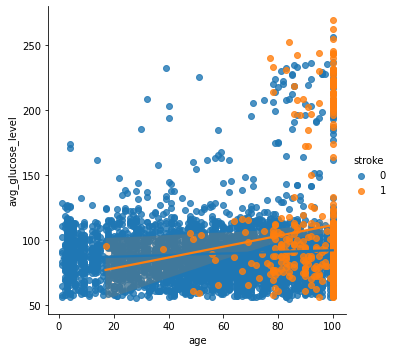

In [18]:
sns.lmplot(data=df, x="age", y="avg_glucose_level", hue="stroke")

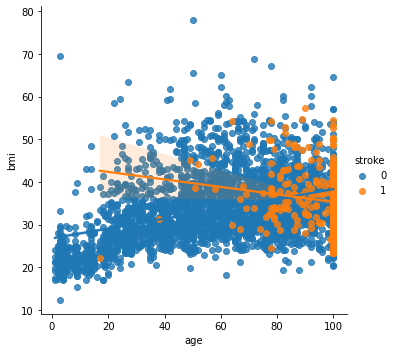

In [19]:
sns.lmplot(data=df, x="age", y="bmi", hue="stroke")

In [20]:
df1

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,36,0,0,2,1,93.962305,33.72,2,0
1,0,79,0,0,2,1,NaN,31.32,2,1
2,1,68,0,0,2,1,99.642305,30.60,1,0
3,1,34,0,0,2,0,75.752305,29.76,0,0
4,1,88,0,0,3,0,92.352305,34.44,2,0
...,...,...,...,...,...,...,...,...,...,...
4991,0,85,0,1,2,1,185.792305,31.80,2,0
4992,0,26,0,0,3,1,77.762305,23.40,0,0
4993,1,19,0,0,4,1,59.342305,21.96,0,0
4996,0,100,0,0,2,0,200.892305,54.60,2,1


In [30]:
# Specify the column name
column_name = 'bmi'  

# Create a subset of the column with null values
df5 = df[df[column_name].isnull()]
df5

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,0,84,0,0,2,0,103.382305,NaN,0,0
12,0,51,0,0,2,0,110.282305,NaN,0,0
14,0,93,0,0,2,0,77.432305,NaN,2,0
16,0,100,0,0,0,0,NaN,NaN,2,0
18,0,78,1,0,3,0,99.712305,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...
4987,1,100,1,0,2,1,100.792305,NaN,3,1
4994,1,100,0,0,3,0,77.312305,NaN,2,0
4995,0,73,0,0,2,0,66.712305,NaN,2,0
4998,1,16,0,0,4,1,60.892305,NaN,0,0


In [31]:
X_df5 = df5[['age', 'work_type', 'smoking_status','Residence_type']]

# Predict the missing values in the subset
y_pred = model_3.predict(X_df5)

# Assign the predicted values back to the original dataset
df5.loc[df5['bmi'].isnull(), 'bmi'] = y_pred
df5

/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_3264/4028125662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[df5['bmi'].isnull(), 'bmi'] = y_pred


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,0,84,0,0,2,0,103.382305,34.625049,0,0
12,0,51,0,0,2,0,110.282305,32.017694,0,0
14,0,93,0,0,2,0,77.432305,37.003707,2,0
16,0,100,0,0,0,0,NaN,40.208846,2,0
18,0,78,1,0,3,0,99.712305,33.658733,1,0
...,...,...,...,...,...,...,...,...,...,...
4987,1,100,1,0,2,1,100.792305,38.214383,3,1
4994,1,100,0,0,3,0,77.312305,36.230750,2,0
4995,0,73,0,0,2,0,66.712305,35.423491,2,0
4998,1,16,0,0,4,1,60.892305,26.424074,0,0


In [70]:
df5.shape

(1552, 10)

In [71]:
df1.shape

(3448, 10)

In [32]:
# Concatenate the known and predicted subsets vertically
merged_df = pd.concat([df1, df5], axis=0)

# Reset the index of the merged dataset
merged_df = merged_df.reset_index(drop=True)

# Print the merged dataset
merged_df

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,36,0,0,2,1,93.962305,33.720000,2,0
1,0,79,0,0,2,1,NaN,31.320000,2,1
2,1,68,0,0,2,1,99.642305,30.600000,1,0
3,1,34,0,0,2,0,75.752305,29.760000,0,0
4,1,88,0,0,3,0,92.352305,34.440000,2,0
...,...,...,...,...,...,...,...,...,...,...
4995,1,100,1,0,2,1,100.792305,38.214383,3,1
4996,1,100,0,0,3,0,77.312305,36.230750,2,0
4997,0,73,0,0,2,0,66.712305,35.423491,2,0
4998,1,16,0,0,4,1,60.892305,26.424074,0,0


In [73]:
na_counts = merged_df.isnull().sum()
print(na_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level    393
bmi                    0
smoking_status         0
stroke                 0
dtype: int64


In [35]:
df3

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,36,0,0,2,1,93.962305,33.72,2,0
2,1,68,0,0,2,1,99.642305,30.60,1,0
3,1,34,0,0,2,0,75.752305,29.76,0,0
4,1,88,0,0,3,0,92.352305,34.44,2,0
5,1,38,0,0,2,1,85.122305,51.00,3,0
...,...,...,...,...,...,...,...,...,...,...
4995,0,73,0,0,2,0,66.712305,NaN,2,0
4996,0,100,0,0,2,0,200.892305,54.60,2,1
4997,0,96,0,0,3,1,72.712305,37.80,2,0
4998,1,16,0,0,4,1,60.892305,NaN,0,0


In [36]:
column_name = 'avg_glucose_level'
df7 = merged_df.dropna(subset=[column_name])
df7

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,36,0,0,2,1,93.962305,33.720000,2,0
2,1,68,0,0,2,1,99.642305,30.600000,1,0
3,1,34,0,0,2,0,75.752305,29.760000,0,0
4,1,88,0,0,3,0,92.352305,34.440000,2,0
5,1,38,0,0,2,1,85.122305,51.000000,3,0
...,...,...,...,...,...,...,...,...,...,...
4995,1,100,1,0,2,1,100.792305,38.214383,3,1
4996,1,100,0,0,3,0,77.312305,36.230750,2,0
4997,0,73,0,0,2,0,66.712305,35.423491,2,0
4998,1,16,0,0,4,1,60.892305,26.424074,0,0


In [37]:
# Specify the column name
column_name = 'avg_glucose_level'  

# Create a subset of the column with null values
df6 = merged_df[merged_df[column_name].isnull()]
df6

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0,79,0,0,2,1,NaN,31.320000,2,1
7,1,83,0,0,0,1,NaN,39.960000,0,0
33,0,100,0,0,2,0,NaN,35.400000,2,1
35,1,47,0,0,2,0,NaN,44.400000,3,0
44,0,100,0,0,3,0,NaN,36.360000,2,1
...,...,...,...,...,...,...,...,...,...,...
4957,0,90,1,0,2,1,NaN,36.590495,2,1
4965,0,72,0,0,2,0,NaN,35.344481,2,0
4973,1,78,0,0,2,1,NaN,33.974805,0,0
4975,0,11,0,0,4,0,NaN,26.205199,0,0


In [40]:
X_df6 = df6[['age', 'bmi']]

# Predict the missing values in the subset
y_pred = model_4.predict(X_df6)

# Assign the predicted values back to the original dataset
df6.loc[df6['avg_glucose_level'].isnull(), 'avg_glucose_level'] = y_pred

/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_3264/953154077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.loc[df6['avg_glucose_level'].isnull(), 'avg_glucose_level'] = y_pred


In [41]:
df6

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0,79,0,0,2,1,93.394494,31.320000,2,1
7,1,83,0,0,0,1,95.888596,39.960000,0,0
33,0,100,0,0,2,0,96.603005,35.400000,2,1
35,1,47,0,0,2,0,93.126518,44.400000,3,0
44,0,100,0,0,3,0,96.832901,36.360000,2,1
...,...,...,...,...,...,...,...,...,...,...
4957,0,90,1,0,2,1,95.825502,36.590495,2,1
4965,0,72,0,0,2,0,93.614439,35.344481,2,0
4973,1,78,0,0,2,1,93.923994,33.974805,0,0
4975,0,11,0,0,4,0,84.943970,26.205199,0,0


In [42]:
# Concatenate the known and predicted subsets vertically
merged_df_2 = pd.concat([df7, df6], axis=0)

# Reset the index of the merged dataset
merged_df_2 = merged_df_2.reset_index(drop=True)

# Print the merged dataset
merged_df_2.head(10)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,36,0,0,2,1,93.962305,33.72,2,0
1,1,68,0,0,2,1,99.642305,30.60,1,0
2,1,34,0,0,2,0,75.752305,29.76,0,0
3,1,88,0,0,3,0,92.352305,34.44,2,0
4,1,38,0,0,2,1,85.122305,51.00,3,0
5,0,94,1,0,2,1,97.442305,49.80,2,0
6,0,8,0,0,4,0,75.492305,21.24,0,0
7,0,21,0,0,4,0,69.632305,26.64,0,0
8,0,100,0,0,0,0,97.282305,34.08,2,0
9,1,22,0,0,2,0,76.692305,29.28,0,0


In [43]:
na_counts = merged_df_2.isnull().sum()
print(na_counts)

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [44]:
# Assuming X is the feature matrix and y is the target variable
X = merged_df_2.drop('stroke',axis=1)  
y = merged_df_2.stroke

In [45]:
#Now, we create test, validation, and training datasets with 0.2 split size
#Initiate the training and Validation dataset
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=786)

#Making Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=123)
X_test

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2702,1,68,0,0,0,0,109.412305,37.080000,2
2683,0,76,0,0,2,1,93.392305,33.480000,3
2494,1,84,1,0,3,1,89.572305,31.800000,2
2680,0,35,0,0,2,1,84.972305,34.080000,2
4902,0,81,1,1,0,0,94.976829,37.040080,0
...,...,...,...,...,...,...,...,...,...
4246,0,28,0,0,2,1,79.662305,30.024266,0
1493,0,78,0,0,2,0,93.452305,36.720000,1
889,1,35,0,0,2,1,85.392305,48.120000,0
1179,1,100,0,0,2,1,64.542305,31.920000,0


In [46]:
#Now, we'll create a list that has the best models for the evaluation procedure.
model_list = []
model_name = ['DecisionTree', 'SVM', 'Rand-Forest', 'MLP','Gaussian', 'LogReg']

model_list.append((DecisionTreeClassifier()))
model_list.append((SVC()))
model_list.append((RandomForestClassifier(n_estimators=100)))
model_list.append((MLPClassifier()))
model_list.append((GaussianNB()))
model_list.append((LogisticRegression()))

In [47]:
#For validation, we can split the data in 3, 5, 10 or 15 folds.  
#I have gone with 5 so as to save computation cost as the accuracy for k=10 or 15 is about the same as k=5.
folds = KFold(n_splits=5)
print("Model name: Accuracy and mean cross value score")

for i in range(0,len(model_list)):   
    #calculating cross value score
    cross_val_score = model_selection.cross_val_score(model_list[i],X_train,y_train,cv=folds,scoring='accuracy')
    #fiting the model
    score = model_list[i].fit(X_train,y_train)
    #predicting the values
    predictions = model_list[i].predict(X_val)
    #calculating accuracy
    acc_score = accuracy_score(y_val,predictions)
    print ('-'*50)
    print ('{0}: {1} and {2}'.format(model_name[i],acc_score,cross_val_score.mean()))
    

Model name: Accuracy and mean cross value score
--------------------------------------------------
DecisionTree: 0.8616 and 0.8643333333333333
--------------------------------------------------
SVM: 0.9184 and 0.8983333333333334
--------------------------------------------------
Rand-Forest: 0.9008 and 0.8936666666666667
--------------------------------------------------
MLP: 0.9136 and 0.8933333333333333
--------------------------------------------------
Gaussian: 0.8768 and 0.868
--------------------------------------------------
LogReg: 0.9088 and 0.8906666666666666


/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [48]:
rfc = RandomForestClassifier() #Default estimator is 100
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
######
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
logreg_prediction
######
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
######
svm = SVC()
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
######
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_prediction = mlp.predict(X_test)
######
gauss = GaussianNB()
gauss.fit(X_train, y_train)
gauss_prediction = gauss.predict(X_test)

/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
print ('-'*60)
print ('ConfusionMatrix RFC:- ')
print (confusion_matrix(y_test,rfc_prediction))
print ('-'*60)
print ('Classification Matrix RFC:')
print (classification_report(y_test,rfc_prediction))

print ('-'*60)
print ('-'*60)
print ('-'*60)
print ('ConfusionMatrix LogReg:- ')
print (confusion_matrix(y_test,logreg_prediction))
print ('-'*60)
print ('Classification Matrix LogReg:')
print (classification_report(y_test,logreg_prediction))

------------------------------------------------------------
ConfusionMatrix RFC:- 
[[650  22]
 [ 58  20]]
------------------------------------------------------------
Classification Matrix RFC:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       672
           1       0.48      0.26      0.33        78

    accuracy                           0.89       750
   macro avg       0.70      0.61      0.64       750
weighted avg       0.87      0.89      0.88       750

------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
ConfusionMatrix LogReg:- 
[[660  12]
 [ 61  17]]
------------------------------------------------------------
Classification Matrix LogReg:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       672
           1       0.59      0.22      0.32   

AUC_RFC: 0.612
AUC_LR: 0.600
AUC_DT: 0.661
AUC_SVM: 0.584
AUC_MLP: 0.557
AUC_GAUSS: 0.681


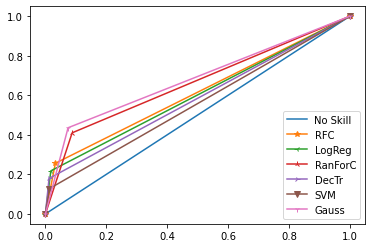

In [50]:
#ROC Curve
auc_rfc = roc_auc_score(y_test, rfc_prediction)
auc_logreg = roc_auc_score(y_test, logreg_prediction)
auc_dt = roc_auc_score(y_test, dt_prediction)
auc_svm = roc_auc_score(y_test, svm_prediction)
auc_mlp = roc_auc_score(y_test, mlp_prediction)
auc_gauss = roc_auc_score(y_test, gauss_prediction)
print('AUC_RFC: %.3f' % auc_rfc)
print('AUC_LR: %.3f' % auc_logreg)
print('AUC_DT: %.3f' % auc_dt)
print('AUC_SVM: %.3f' % auc_svm)
print('AUC_MLP: %.3f' % auc_mlp)
print('AUC_GAUSS: %.3f' % auc_gauss)
# formulating roc curve
fpr, tpr, threshold = roc_curve(y_test, rfc_prediction)
fpr1, tpr1, threshold1 = roc_curve(y_test, logreg_prediction)
fpr2, tpr2, threshold = roc_curve(y_test, dt_prediction)
fpr3, tpr3, threshold1 = roc_curve(y_test, svm_prediction)
fpr4, tpr4, threshold = roc_curve(y_test, mlp_prediction)
fpr5, tpr5, threshold1 = roc_curve(y_test, gauss_prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='-', label='No Skill') 
#"No Skill" line represents the scenario where the model's predictions are random and not informative.
# plot the precision-recall curve for the model
plt.plot(fpr, tpr, marker='*', label='RFC')
plt.plot(fpr1, tpr1, marker='3', label='LogReg')
plt.plot(fpr2, tpr2, marker='2', label='RanForC')
plt.plot(fpr3, tpr3, marker='4', label='DecTr')
plt.plot(fpr4, tpr4, marker='v', label='SVM')
plt.plot(fpr5, tpr5, marker='1', label='Gauss')
plt.legend()
# show the plot
plt.show()

In [51]:
# Load testing data
test_data = pd.read_csv('test.csv').drop(columns=["id"])
test_data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,69,0,0,Private,Rural,103.052305,28.20,never smoked
1,Male,67,0,0,Private,Urban,101.482305,55.08,never smoked
2,Male,89,0,0,Govt_job,Rural,96.332305,NaN,Unknown
3,Female,68,0,0,Self-employed,Urban,72.262305,28.92,never smoked
4,Female,100,0,0,Govt_job,Rural,58.632305,NaN,Unknown
...,...,...,...,...,...,...,...,...,...
995,Female,30,0,0,Private,Urban,80.432305,NaN,smokes
996,Male,60,0,0,Private,Rural,NaN,36.60,Unknown
997,Female,41,0,0,Private,Rural,92.182305,25.80,never smoked
998,Male,92,0,0,Govt_job,Urban,61.162305,NaN,never smoked


In [52]:
le_gender = LabelEncoder()
test_data["gender"] = le_gender.fit_transform(test_data["gender"])
le_work_type = LabelEncoder()
test_data["work_type"] = le_work_type.fit_transform(test_data["work_type"])
le_Residence_type = LabelEncoder()
test_data["Residence_type"] = le_Residence_type.fit_transform(test_data["Residence_type"])
le_smoking_status = LabelEncoder()
test_data["smoking_status"] = le_smoking_status.fit_transform(test_data["smoking_status"])
test_data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,69,0,0,2,0,103.052305,28.20,2
1,1,67,0,0,2,1,101.482305,55.08,2
2,1,89,0,0,0,0,96.332305,NaN,0
3,0,68,0,0,3,1,72.262305,28.92,2
4,0,100,0,0,0,0,58.632305,NaN,0
...,...,...,...,...,...,...,...,...,...
995,0,30,0,0,2,1,80.432305,NaN,3
996,1,60,0,0,2,0,NaN,36.60,0
997,0,41,0,0,2,0,92.182305,25.80,2
998,1,92,0,0,0,1,61.162305,NaN,2


In [53]:
na_counts = test_data.isnull().sum()
print(na_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level     84
bmi                  308
smoking_status         0
dtype: int64


In [54]:
test_data1 = test_data
column_name = 'bmi'
test_data1 = test_data1.dropna(subset=[column_name])
test_data1

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,69,0,0,2,0,103.052305,28.20,2
1,1,67,0,0,2,1,101.482305,55.08,2
3,0,68,0,0,3,1,72.262305,28.92,2
6,0,59,0,0,2,1,89.892305,34.80,3
10,1,100,0,0,2,1,85.192305,26.52,3
...,...,...,...,...,...,...,...,...,...
993,0,78,0,0,2,0,58.382305,52.44,1
994,1,11,0,0,4,1,92.182305,23.76,0
996,1,60,0,0,2,0,NaN,36.60,0
997,0,41,0,0,2,0,92.182305,25.80,2


In [55]:
# Specify the column name
column_name = 'bmi'  

# Create a subset of the column with null values
test_data2 = test_data[test_data[column_name].isnull()]
test_data2

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2,1,89,0,0,0,0,96.332305,NaN,0
4,0,100,0,0,0,0,58.632305,NaN,0
5,0,79,0,0,0,1,61.872305,NaN,2
7,0,100,0,0,3,1,69.582305,NaN,2
8,1,100,0,0,2,1,83.522305,NaN,2
...,...,...,...,...,...,...,...,...,...
989,1,62,1,0,2,0,85.362305,NaN,1
990,0,21,0,0,1,1,NaN,NaN,0
991,1,89,0,0,0,0,77.892305,NaN,2
995,0,30,0,0,2,1,80.432305,NaN,3


In [56]:
age = test_data2[['age', 'work_type', 'smoking_status','Residence_type']]

# Predict the missing values in the subset
y_pred_2 = model_3.predict(age)

# Assign the predicted values back to the original dataset
test_data2.loc[test_data2['bmi'].isnull(), 'bmi'] = y_pred_2


test_data2

/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_3264/927994829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data2.loc[test_data2['bmi'].isnull(), 'bmi'] = y_pred_2


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2,1,89,0,0,0,0,96.332305,37.672166,0
4,0,100,0,0,0,0,58.632305,38.541285,0
5,0,79,0,0,0,1,61.872305,38.373440,2
7,0,100,0,0,3,1,69.582305,36.054570,2
8,1,100,0,0,2,1,83.522305,37.380602,2
...,...,...,...,...,...,...,...,...,...
989,1,62,1,0,2,0,85.362305,33.720593,1
990,0,21,0,0,1,1,NaN,30.797223,0
991,1,89,0,0,0,0,77.892305,39.339727,2
995,0,30,0,0,2,1,80.432305,32.683629,3


In [87]:
# Concatenate the known and predicted subsets vertically
merged_df_3 = pd.concat([test_data1, test_data2], axis=0)

# Reset the index of the merged dataset
merged_df_3 = merged_df_3.reset_index(drop=True)

# Print the merged dataset
merged_df_3

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,69,0,0,2,0,103.052305,28.200000,2
1,1,67,0,0,2,1,101.482305,55.080000,2
2,0,68,0,0,3,1,72.262305,28.920000,2
3,0,59,0,0,2,1,89.892305,34.800000,3
4,1,100,0,0,2,1,85.192305,26.520000,3
...,...,...,...,...,...,...,...,...,...
995,1,62,1,0,2,0,85.362305,33.709496,1
996,0,21,0,0,1,1,NaN,29.341518,0
997,1,89,0,0,0,0,77.892305,36.585968,2
998,0,30,0,0,2,1,80.432305,30.300343,3


In [88]:
na_counts = merged_df_3.isnull().sum()
print(na_counts)

gender                0
age                   0
hypertension          0
heart_disease         0
work_type             0
Residence_type        0
avg_glucose_level    84
bmi                   0
smoking_status        0
dtype: int64


In [89]:

column_name = 'avg_glucose_level'
test_data3 = merged_df_3.dropna(subset=[column_name])
test_data3

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,69,0,0,2,0,103.052305,28.200000,2
1,1,67,0,0,2,1,101.482305,55.080000,2
2,0,68,0,0,3,1,72.262305,28.920000,2
3,0,59,0,0,2,1,89.892305,34.800000,3
4,1,100,0,0,2,1,85.192305,26.520000,3
...,...,...,...,...,...,...,...,...,...
994,0,39,0,0,2,0,67.992305,31.259167,2
995,1,62,1,0,2,0,85.362305,33.709496,1
997,1,89,0,0,0,0,77.892305,36.585968,2
998,0,30,0,0,2,1,80.432305,30.300343,3


In [90]:
# Specify the column name
column_name = 'avg_glucose_level'  

# Create a subset of the column with null values
test_data4 = merged_df_3[merged_df_3[column_name].isnull()]
test_data4

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5,1,59,0,0,2,1,NaN,38.160000,3
13,1,70,0,0,2,1,NaN,45.720000,1
44,0,70,0,0,3,0,NaN,27.120000,2
64,0,88,1,0,2,0,NaN,54.480000,2
78,1,5,0,0,4,0,NaN,22.320000,0
...,...,...,...,...,...,...,...,...,...
946,0,84,0,0,2,1,NaN,36.053288,2
953,1,83,0,0,2,1,NaN,35.946752,2
974,0,3,0,0,4,1,NaN,27.423870,0
993,0,39,0,0,2,0,NaN,31.259167,2


In [92]:
age_2 = test_data4[['age', 'bmi']]

# Predict the missing values in the subset
y_pred_3 = model_4.predict(age_2)

# Assign the predicted values back to the original dataset
test_data4.loc[test_data4['avg_glucose_level'].isnull(), 'avg_glucose_level'] = y_pred_3
test_data4

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5,1,59,0,0,2,1,92.907310,38.160000,3
13,1,70,0,0,2,1,95.886597,45.720000,1
44,0,70,0,0,3,0,91.432362,27.120000,2
64,0,88,1,0,2,0,99.897072,54.480000,2
78,1,5,0,0,4,0,83.376004,22.320000,0
...,...,...,...,...,...,...,...,...,...
946,0,84,0,0,2,1,95.059296,36.053288,2
953,1,83,0,0,2,1,94.927524,35.946752,2
974,0,3,0,0,4,1,84.385734,27.423870,0
993,0,39,0,0,2,0,89.129540,31.259167,2


In [93]:
# Concatenate the known and predicted subsets vertically
merged_df_4 = pd.concat([test_data3, test_data4], axis=0)

# Reset the index of the merged dataset
merged_df_4 = merged_df_4.reset_index(drop=True)

# Print the merged dataset
merged_df_4

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,69,0,0,2,0,103.052305,28.200000,2
1,1,67,0,0,2,1,101.482305,55.080000,2
2,0,68,0,0,3,1,72.262305,28.920000,2
3,0,59,0,0,2,1,89.892305,34.800000,3
4,1,100,0,0,2,1,85.192305,26.520000,3
...,...,...,...,...,...,...,...,...,...
995,0,84,0,0,2,1,95.059296,36.053288,2
996,1,83,0,0,2,1,94.927524,35.946752,2
997,0,3,0,0,4,1,84.385734,27.423870,0
998,0,39,0,0,2,0,89.129540,31.259167,2


In [94]:
na_counts = merged_df_4.isnull().sum()
print(na_counts)

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [95]:
X_test = merged_df_4
X_test

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,69,0,0,2,0,103.052305,28.200000,2
1,1,67,0,0,2,1,101.482305,55.080000,2
2,0,68,0,0,3,1,72.262305,28.920000,2
3,0,59,0,0,2,1,89.892305,34.800000,3
4,1,100,0,0,2,1,85.192305,26.520000,3
...,...,...,...,...,...,...,...,...,...
995,0,84,0,0,2,1,95.059296,36.053288,2
996,1,83,0,0,2,1,94.927524,35.946752,2
997,0,3,0,0,4,1,84.385734,27.423870,0
998,0,39,0,0,2,0,89.129540,31.259167,2


In [96]:
# Predict the probability of the positive class
stroke = rfc.predict_proba(X_test)[:, 1]

In [56]:
stroke


array([0.  , 0.07, 0.02, 0.  , 0.51, 0.61, 0.01, 0.16, 0.05, 0.24, 0.15,
       0.  , 0.1 , 0.36, 0.13, 0.  , 0.43, 0.01, 0.  , 0.01, 0.16, 0.22,
       0.1 , 0.  , 0.01, 0.23, 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.07,
       0.21, 0.44, 0.01, 0.01, 0.  , 0.03, 0.23, 0.  , 0.  , 0.09, 0.69,
       0.25, 0.4 , 0.06, 0.  , 0.18, 0.03, 0.  , 0.01, 0.1 , 0.28, 0.03,
       0.18, 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.15, 0.  , 0.03, 0.  ,
       0.32, 0.39, 0.21, 0.05, 0.14, 0.27, 0.21, 0.07, 0.04, 0.  , 0.  ,
       0.  , 0.02, 0.  , 0.14, 0.3 , 0.01, 0.26, 0.  , 0.  , 0.02, 0.  ,
       0.  , 0.31, 0.44, 0.04, 0.26, 0.  , 0.  , 0.01, 0.71, 0.06, 0.  ,
       0.01, 0.18, 0.12, 0.56, 0.07, 0.  , 0.01, 0.  , 0.05, 0.04, 0.01,
       0.  , 0.09, 0.  , 0.5 , 0.  , 0.14, 0.08, 0.  , 0.01, 0.02, 0.01,
       0.03, 0.  , 0.21, 0.15, 0.01, 0.  , 0.  , 0.11, 0.01, 0.27, 0.31,
       0.  , 0.38, 0.  , 0.  , 0.  , 0.01, 0.36, 0.48, 0.16, 0.05, 0.36,
       0.03, 0.16, 0.31, 0.14, 0.01, 0.25, 0.02, 0.

In [64]:
# Load test data
test_data_id = pd.read_csv('test.csv')

id_values = test_data_id['id']

# Create DataFrame for id values
id_df = pd.DataFrame({'id': id_values})

# Create DataFrame for predicted probabilities
pred_df = pd.DataFrame({'stroke': probabilities[:, 1]})

# Combine id and predicted probabilities into a single DataFrame
output_df = pd.concat([id_df, pred_df], axis=1)

output_df

NameError: name 'probabilities' is not defined

In [68]:
# Write the DataFrame to a CSV file
output_df.to_csv('output_10.csv', index=False)

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import numpy as np
A_test = pd.read_csv('train.csv').drop(columns=["id"]

# Assuming X_train, y_train, X_test are the datasets with missing values

# Create and fit the imputer on the training dataset
imputer_X = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_X.fit(X)

# Impute missing values in the training dataset and test dataset
X_train_imp = imputer_X.transform(X)
X_test_imp = imputer_X.transform(A_test)



# Create and train the SVM classifier on the imputed training data and target variable
svm = SVC(probability=True)
svm.fit(X_train_imp, y)

# Predict probabilities for the imputed test dataset
probabilities = svm.predict_proba(X_test_imp)


SyntaxError: invalid syntax (1824122074.py, line 9)

In [66]:
probabilities


array([[0.91266292, 0.08733708],
       [0.91290653, 0.08709347],
       [0.91049031, 0.08950969],
       ...,
       [0.91087282, 0.08912718],
       [0.91087435, 0.08912565],
       [0.91017247, 0.08982753]])

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
A_test = pd.read_csv('train.csv').drop(columns=["id"]

# Perform MICE imputation to fill the missing values
# Create an IterativeImputer with a reasonable max_iter value
imputer = IterativeImputer(max_iter=10, random_state=0)
X_imputed = imputer.fit_transform(X)

# Split the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Support Vector Classifier
classifier = SVC(kernel='rbf', C=1.0, probability=True)  # Set probability to True
classifier.fit(X_train_scaled, y_train)


X_test_imp = imputer.fit_transform(A_test)
# Predict probabilities on the test set
probabilitie = classifier.predict_proba(X_test_imp)

# Print the probabilities for each class label
print("Class Probabilities:")
print(probabilitie)


SyntaxError: invalid syntax (4157713494.py, line 9)

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load train and test datasets from CSV files
df = pd.read_csv('train.csv')
le_gender = LabelEncoder()
df["gender"] = le_gender.fit_transform(df["gender"])
le_work_type = LabelEncoder()
df["work_type"] = le_work_type.fit_transform(df["work_type"])
le_Residence_type = LabelEncoder()
df["Residence_type"] = le_Residence_type.fit_transform(df["Residence_type"])
le_smoking_status = LabelEncoder()
df["smoking_status"] = le_smoking_status.fit_transform(df["smoking_status"])
df
dft = pd.read_csv('test.csv')
le_gender = LabelEncoder()
dft["gender"] = le_gender.fit_transform(dft["gender"])
le_work_type = LabelEncoder()
dft["work_type"] = le_work_type.fit_transform(dft["work_type"])
le_Residence_type = LabelEncoder()
dft["Residence_type"] = le_Residence_type.fit_transform(dft["Residence_type"])
le_smoking_status = LabelEncoder()
dft["smoking_status"] = le_smoking_status.fit_transform(dft["smoking_status"])
                                         
# Assuming 'X_train' and 'X_test' are the features DataFrames, and 'y_train' is the target variable
X_train = df.drop(columns=['stroke'])  # Replace 'target' with your target column name
y_train = df['stroke']  # Replace 'target' with your target column name
X_test = dft

# Initialize the IterativeImputer with max_iter and other parameters
imputer = IterativeImputer(max_iter=10, random_state=0)  # Adjust max_iter as needed

# Perform MICE imputation on the training set
X_train_imputed = imputer.fit_transform(X_train)

# Perform MICE imputation on the test set using the same imputer
X_test_imputed = imputer.transform(X_test)

# Convert the imputed arrays back to DataFrames with column names
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)





In [ ]:
# Define the hyperparameter grid for model tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}

# Initialize the model (SVC in this example)
model = SVC()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_imputed_df, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test_imputed_df, y_test)  # Replace y_test with your test labels

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)